Neural Network Type: Single-Layer Perceptron
Task: Classify handwritten digits from the MNIST dataset (simplified to two digits, e.g., 0 vs 1)
Framework: TensorFlow + Keras
Environment: Python 3.10

Why this network is simplest:

Only 1 layer (Dense layer)

No hidden layers

No complex operations like convolutions or recursions

# Import required libraries

In [2]:
# Why: These are all we need — TensorFlow includes Keras (which simplifies NN creation), and matplotlib is for plotting.
!pip install tensorflow

# Then import the required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Verify TensorFlow installation
print(f"TensorFlow version: {tf.__version__}")

  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/376.0 MB 5.6 MB/s eta 0:01:08
   ---------------------------------------- 2.6/376.0 MB 7.2 MB/s eta 0:00:52
    --------------------------------------- 5.0/376.0 MB 9.1 MB/s eta 0:00:41
    --------------------------------------- 7.9/376.0 MB 9.9 

# load and preprocess dataset

In [3]:
# We'll use the MNIST digits dataset and filter only digits "0" and "1" for binary classification.
# Why: Normalization helps the model train faster. Flattening is required because the basic 
# Dense layer expects 1D input (not 2D images).

# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Filter only digits 0 and 1
train_filter = (y_train == 0) | (y_train == 1)
test_filter = (y_test == 0) | (y_test == 1)

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Normalize the images (0–255 to 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images (28x28 to 784)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Define the simplest neural network

In [5]:
# Why this is the simplest: Only one layer (Dense). One output neuron (binary classification).
# Sigmoid activation outputs a probability between 0 and 1

model = keras.Sequential([
    keras.Input(shape=(784,)),
    layers.Dense(1, activation='sigmoid')
])


# Compile the model

In [6]:
# Why: SGD is the simplest optimizer. Binary crossentropy fits our binary output.

model.compile(
    optimizer='sgd',  # Simple gradient descent
    loss='binary_crossentropy',  # For binary classification
    metrics=['accuracy']
)


# Train the model

In [7]:
# Why: Only 10 epochs for quick training. validation_data helps us track performance on unseen data.

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9946 - loss: 0.1073 - val_accuracy: 0.9986 - val_loss: 0.0347
Epoch 2/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9975 - loss: 0.0315 - val_accuracy: 0.9986 - val_loss: 0.0202
Epoch 3/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9976 - loss: 0.0222 - val_accuracy: 0.9991 - val_loss: 0.0148
Epoch 4/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9977 - loss: 0.0180 - val_accuracy: 0.9991 - val_loss: 0.0120
Epoch 5/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9977 - loss: 0.0155 - val_accuracy: 0.9991 - val_loss: 0.0103
Epoch 6/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9978 - loss: 0.0138 - val_accuracy: 0.9991 - val_loss: 0.0091
Epoch 7/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9978 - loss: 0.0126 - val_accuracy: 0.9991 - val_loss: 0.0082
Epoch 8/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9978 - loss: 0.0117 - val_accuracy: 0.

# Evaluate the model

In [9]:
# Why: Always evaluate on separate data to ensure your model isn’t overfitting.
# model.evaluate(...)	Test the model’s performance on test data
# test_loss, test_acc = ...	Get loss and accuracy values
# print(...)	Show test accuracy to user

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9991 - loss: 0.0065
Test accuracy: 1.00


# Plot accuracy over epochs (optional)

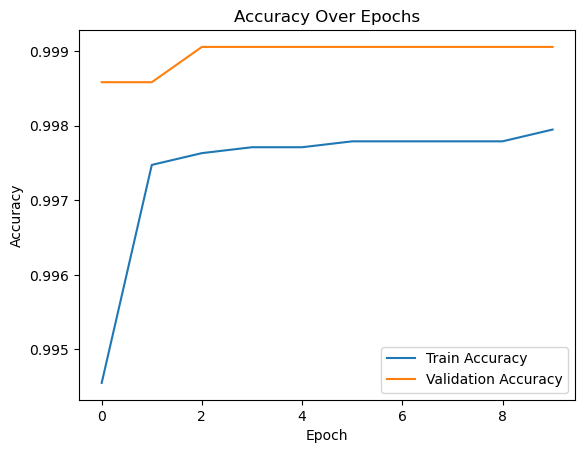

In [10]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

# Plot a confusion matrix

In [11]:
# install seaborn
!pip install seaborn

In [13]:
# install required libraries
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [15]:
# generate predictions on the test data
# The model outputs probabilities (e.g., 0.87, 0.12)
# We threshold at 0.5 to convert to 0 or 1
# .flatten() turns from shape (n,1) to (n,)

# Predict probabilities
y_pred_probs = model.predict(x_test)

# Convert probabilities to class labels (0 or 1)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


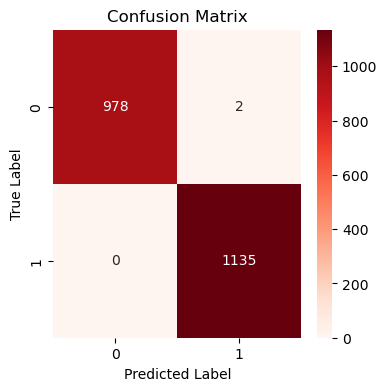

In [18]:
# create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot with seaborn
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Visualize Misclassified Images

In [20]:
# get misclassified image indices

# Find indices where prediction != true label
misclassified_indices = np.where(y_pred != y_test)[0]
print(f"Total misclassified: {len(misclassified_indices)}")


Total misclassified: 2


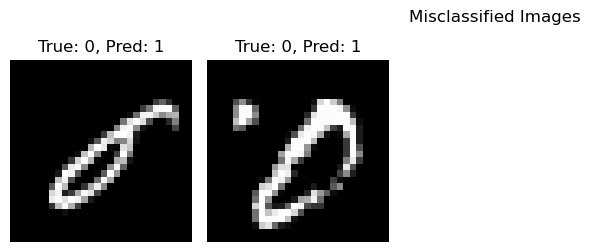

In [21]:
# plot misclassified images

plt.figure(figsize=(10, 5))

for i, idx in enumerate(misclassified_indices[:10]):
    image = x_test[idx].reshape(28, 28)  # reshape for display
    true_label = y_test[idx]
    predicted_label = y_pred[idx]
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    plt.axis('off')

plt.suptitle("Misclassified Images")
plt.tight_layout()
plt.show()


# Calculate Precision, Recall, and F1 Score

In [23]:
# import and compute metrics
# Precision: TP / (TP + FP) — How many predicted positives were correct
# Recall: TP / (TP + FN) — How many actual positives were caught
# F1 Score: Harmonic mean of precision & recall
# Support: Number of samples in each class

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=["Digit 0", "Digit 1"]))


              precision    recall  f1-score   support

     Digit 0       1.00      1.00      1.00       980
     Digit 1       1.00      1.00      1.00      1135

    accuracy                           1.00      2115
   macro avg       1.00      1.00      1.00      2115
weighted avg       1.00      1.00      1.00      2115

